# <b> Decision Tree </b>
___

<b> Table of Content: </b>
<br> <b> [Pipeline_1](#8000) </b>
<br> [1.0 Basic Model: Decision Tree](#800100)
<br> [1.1 Oversampling (SMOTE)](#800110)
<br> [1.2 Undersampling (NearMiss)](#800120)
<br> [1.3 Cross Validation (Oversampling)](#800130)
<br> [1.4 Cross Validation (Undersampling)](#800140)
<br> [1.5 Model Tuning (Hyperparameters)](#800150)
<br>  <b>  [Pipeline 2](#8010) </b>
<br> [2.0 Basic Model: Decision Tree](#800200)
<br> [2.1 Oversampling (SMOTE)](#800210)
<br> [2.2 Undersampling (NearMiss)](#800220)
<br> [2.3 Cross Validation (Oversampling)](#800230)
<br> [2.4 Cross Validation (Undersampling)](#800240)
<br> [2.5 Model Tuning (Hyperparameters)](#800250)
<br> [2.6 Feature Importance](#800260)
<br>  <b>[Pipeline 3](#8020) </b>
<br> [3.0 Basic Model: Decision Tree](#800300)
<br> [3.1 Oversampling (SMOTE)](#800310)
<br> [3.2 Undersampling (NearMiss)](#800320)
<br> [3.3 Cross Validation (Oversampling)](#800330)
<br> [3.4 Cross Validation (Undersampling)](#800340)
<br> [3.5 Model Tuning (Hyperparameters)](#800350)
<br> <b> [Results](#81000) </b>
___

<b> Loading Required Modules

In [23]:
# import modules
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ROC Curve and AUC
from sklearn.metrics import roc_auc_score

# for plotting
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# import module for gridsearch (to find optimal hyper-parameters)
from sklearn.model_selection import GridSearchCV

# import module (to test execution time of a codeblock to run)
import time

import warnings

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [24]:
# packages for Receiver Operating Characteristic (ROC) with cross validation
# source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_roc_crossval.html
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

Automatically created module for IPython interactive environment


<a id = "8000"> <h2> Pipeline 1 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [25]:
df_pipeline1 = pd.read_csv("pipeline_1.csv")

<b> show all columns in dataset

In [26]:
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [27]:
print('Number of rows in the dataset:', df_pipeline1.shape[0])
print('Number of columns in the dataset:', df_pipeline1.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 23


<a id = "800100"> <h2> 1.0 Basic Model Decision Tree Classifier </h2> </a>

In [29]:
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [30]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8564476885644768


In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3131
           1       0.53      0.52      0.53       568

    accuracy                           0.86      3699
   macro avg       0.72      0.72      0.72      3699
weighted avg       0.86      0.86      0.86      3699



In [34]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2871  260]
 [ 271  297]]


<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [35]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

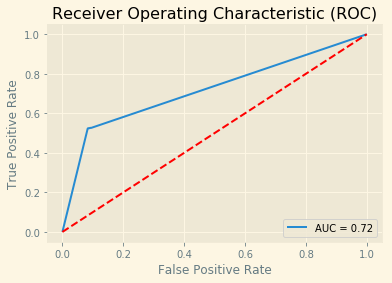

AUC score: 0.7187253993459319


In [36]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "800110"> <h2> 1.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [37]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 22)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the <b> training </b> dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_res, y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3131
           1       0.48      0.63      0.55       568

    accuracy                           0.84      3699
   macro avg       0.70      0.75      0.72      3699
weighted avg       0.86      0.84      0.85      3699



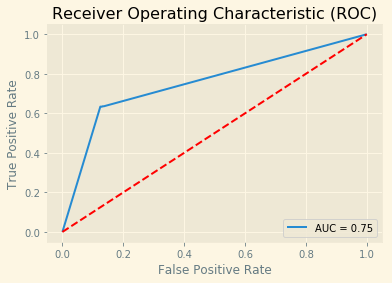

AUC score: 0.753284679331177


In [39]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "800120"> <h2> 1.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [40]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (2680, 22)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The NearMiss Algorithm has undersampled the instances in the majority class and made it equal to minority class:
* Both classes (0 & 1) now have 1340 instances, the dataset is balanced.
* Class 0 decreased from 7291 instances to 1340 instances, a decrease of 5951 instances of class 0.

In [41]:
# train the model on train set 
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_miss, y_train_miss) 
y_pred = clf2.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.28      0.41      3131
           1       0.15      0.70      0.25       568

    accuracy                           0.34      3699
   macro avg       0.49      0.49      0.33      3699
weighted avg       0.73      0.34      0.39      3699



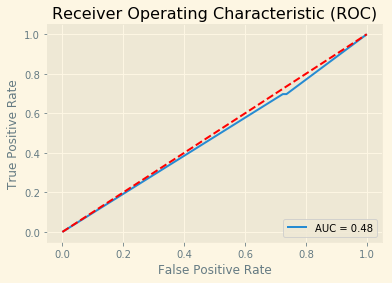

AUC score: 0.48472903855583194


In [42]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "800130"> <h2> 1.3 Cross Validation (Oversampling)  </h2> </a>

In [43]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
result = cross_val_score(clf, X_train_res, y_train_res, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.86840302 0.87662783 0.87722908 0.87860082 0.87928669 0.86213992
 0.8696845  0.87722908 0.86694102 0.87860082] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8735 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.34063
to:
0.87347
This is because we only use: 90.00% of our dataset to train the model!


In [44]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.8676518  0.88211004 0.87655831 0.87657482 0.88409428 0.86276794
 0.86694352 0.87452865 0.86899339 0.8710344 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8731 



<b> ROC Curve Cross validation on oversampled dataset

In [45]:
def roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=DecisionTreeClassifier(), user_defined_splits=10):
    # define two lists to write to for the true positive rate and the auc scores
    cv = StratifiedKFold(n_splits=user_defined_splits)
    tprs = []
    aucs = []
    
    # plot the line through the middle
    # Return evenly spaced numbers over a specified interval.
    mean_fpr = np.linspace(0, 1, 100)

    # set the figure and ax objects with the figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # for loop to iterate over multiple folds
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    # print out the mean AUC score
    print('Mean AUC score', mean_auc)

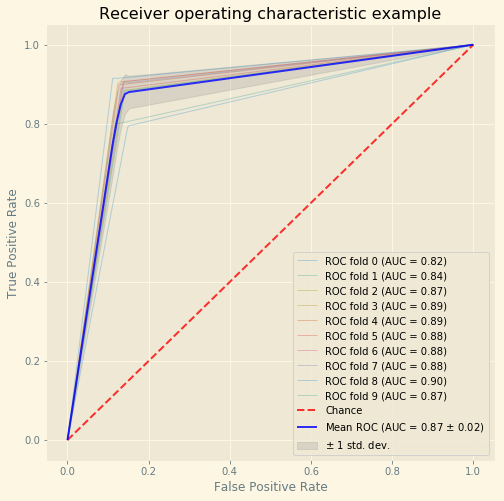

Mean AUC score 0.872895235240508


In [46]:
# apply the function to plot the ROC curve with the average AUC score
roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=DecisionTreeClassifier(), user_defined_splits=10)

<a id = "800140"> <h2> 1.4 Cross Validation (Undersampling)  </h2> </a>

In [47]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
result = cross_val_score(clf2, X_train_miss, y_train_miss, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.67164179 0.71268657 0.65671642 0.74253731 0.72761194 0.66791045
 0.75746269 0.66044776 0.67910448 0.66044776] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.6937 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.34063
to:
0.69366
This is because we only use: 90.00% of our dataset to train the model!


In [49]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf2, X_train_miss, y_train_miss, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.66765572 0.72403459 0.66122912 0.74244767 0.70872768 0.67542285
 0.76465997 0.66037684 0.6786721  0.67083171] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.6954 



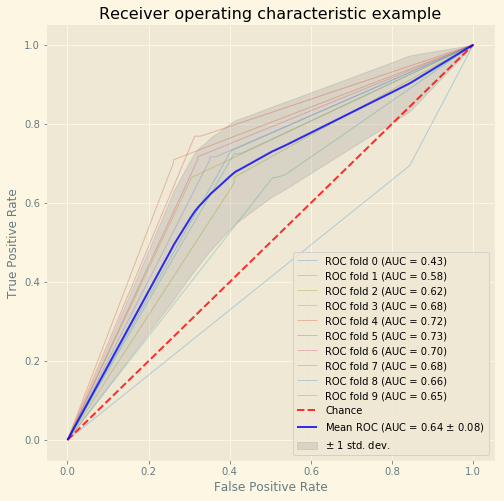

Mean AUC score 0.6447609506500581


In [51]:
# apply the function to plot the ROC curve with the average AUC score
roc_curve_kfold_cross_validation(X=X_train_miss, y=y_train_miss, classifier=DecisionTreeClassifier(), user_defined_splits=10)

<a id = "800150"> <h2> 1.5 Model Tuning (Hyperparameters) </h2> </a>
___


<b> Define Grid

In [52]:
criterion= ['gini', 'entropy'] 
splitter= ['best', 'random'] 
max_depth= [3,5,10] 
param_grid = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

<b> Hyper-parameter tweaking on oversampled training set

In [53]:
# set the start time
start = time.time()

# define the model
clf = DecisionTreeClassifier()

# Create a grid search object
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_criterion = grid.best_estimator_.get_params()['criterion']
optimal_splitter = grid.best_estimator_.get_params()['splitter']
optimal_max_depth = grid.best_estimator_.get_params()['max_depth']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.868948 using {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
--- Execution time: ---
--- 3034.572ms. --- 
--- 3.034572124481201 seconds ---
--- 0.05057620207468669 minutes ---


<b> Applying the optimal hyper-parameters on oversampled training set

In [54]:
# apply the optimal hyper-parameters to the Logistic Regression Model
clf3 = DecisionTreeClassifier(criterion=optimal_criterion, splitter=optimal_splitter, max_depth=optimal_max_depth)

# fit/train the model with oversampled training set
clf3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=clf3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3131
           1       0.53      0.74      0.62       568

    accuracy                           0.86      3699
   macro avg       0.74      0.81      0.76      3699
weighted avg       0.88      0.86      0.87      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [222]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.85744464 0.88000252 0.8758201  0.87793426 0.86003254 0.87036909
 0.86407572 0.87041093 0.86008441 0.88199554] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8698 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.93355362 0.9497264  0.92818908 0.93622366 0.92882512 0.93020621
 0.93143868 0.93667093 0.93322419 0.93678308] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9345 



<b> Cross validation on X and Y

In [223]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(clf3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(clf3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8854 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8868 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8847


<a id = "8010"> <h2> Pipeline 2 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [67]:
# load the dataset
df_pipeline2 = pd.read_csv("pipeline_2.csv")

<b> show all columns in dataset

In [68]:
list(df_pipeline2.columns)[:]

['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

<a id = "800200"> <h2> 2.0 Basic Model Decision Tree Classifier </h2> </a>

In [69]:
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [70]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [71]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8567180319005137


In [73]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3131
           1       0.53      0.57      0.55       568

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.73      3699
weighted avg       0.86      0.86      0.86      3699



In [74]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2845  286]
 [ 244  324]]


<b> ROC Curve

In [75]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

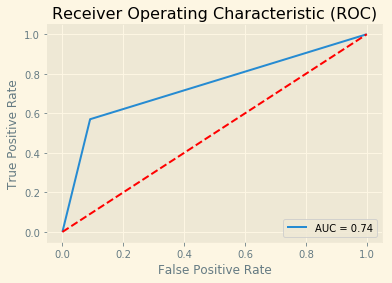

AUC score: 0.7395614504658098


In [76]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "800210"> <h2> 2.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [77]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 21)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the <b> training </b> dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [78]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_res,y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3131
           1       0.53      0.66      0.59       568

    accuracy                           0.86      3699
   macro avg       0.73      0.78      0.75      3699
weighted avg       0.87      0.86      0.86      3699



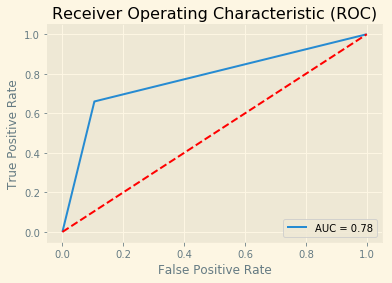

AUC score: 0.777457984894355


In [80]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "800220"> <h2> 2.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [81]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (2680, 21)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The NearMiss Algorithm has undersampled the instances in the majority class and made it equal to minority class:
* Both classes (0 & 1) now have 1340 instances, the dataset is balanced.
* Class 0 decreased from 7291 instances to 1340 instances, a decrease of 5951 instances of class 0.

In [82]:
# train the model on train set 
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_miss, y_train_miss) 
y_pred = clf2.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.55      0.68      3131
           1       0.21      0.68      0.33       568

    accuracy                           0.57      3699
   macro avg       0.56      0.61      0.51      3699
weighted avg       0.80      0.57      0.63      3699



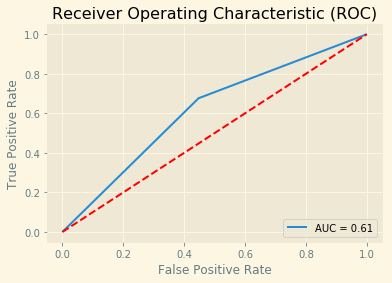

AUC score: 0.6144416804242896


In [84]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "800230"> <h2> 2.3 Cross Validation (Oversampling)  </h2> </a>

In [85]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
result = cross_val_score(clf, X_train_res, y_train_res, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.89102125 0.89444825 0.90192044 0.90192044 0.89986283 0.89643347
 0.89780521 0.89026063 0.88203018 0.89163237] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8947 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.56988
to:
0.89473
This is because we only use: 90.00% of our dataset to train the model!


In [87]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.89650737 0.89374768 0.90536137 0.90397335 0.90603456 0.8930025
 0.89026683 0.88410117 0.88340038 0.8901821 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8947 



<b> ROC Curve Cross validation on oversampled dataset

In [88]:
def roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=DecisionTreeClassifier(), user_defined_splits=10):
    # define two lists to write to for the true positive rate and the auc scores
    cv = StratifiedKFold(n_splits=user_defined_splits)
    tprs = []
    aucs = []
    
    # plot the line through the middle
    # Return evenly spaced numbers over a specified interval.
    mean_fpr = np.linspace(0, 1, 100)

    # set the figure and ax objects with the figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # for loop to iterate over multiple folds
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    # print out the mean AUC score
    print('Mean AUC score', mean_auc)

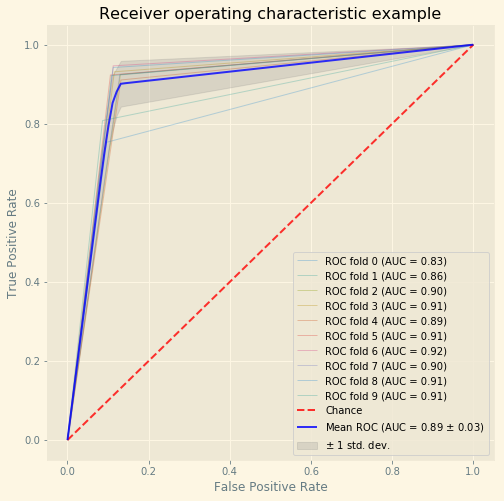

Mean AUC score 0.8927883229386151


In [90]:
# apply the function to plot the ROC curve with the average AUC score
roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=DecisionTreeClassifier(), user_defined_splits=10)

<a id = "800240"> <h2> 2.4 Cross Validation (Undersampling)  </h2> </a>

In [91]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
result = cross_val_score(clf2, X_train_miss, y_train_miss, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.72014925 0.66791045 0.67910448 0.70522388 0.68656716 0.68283582
 0.68656716 0.73134328 0.72014925 0.74626866] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.7026 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.56988
to:
0.70261
This is because we only use: 90.00% of our dataset to train the model!


In [92]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf2, X_train_miss, y_train_miss, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.73053168 0.67083171 0.69474697 0.7275778  0.70149254 0.68263708
 0.70089286 0.73877687 0.70493859 0.7203403 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.7073 



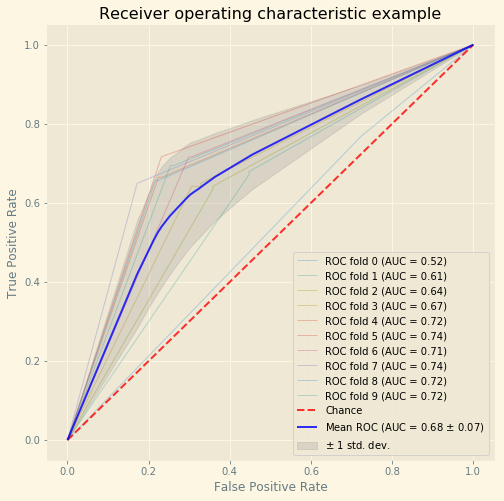

Mean AUC score 0.6789098670667717


In [248]:
# apply the function to plot the ROC curve with the average AUC score
roc_curve_kfold_cross_validation(X=X_train_miss, y=y_train_miss, classifier=DecisionTreeClassifier(), user_defined_splits=10)

<a id = "800250"> <h2> 2.5 Model Tuning (Hyperparameters) </h2> </a>
___


<b> Define Grid

In [93]:
criterion= ['gini', 'entropy'] 
splitter= ['best', 'random'] 
max_depth= [3,5,10] 
param_grid = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

<b> Hyper-parameter tweaking on oversampled training set

In [94]:
# set the start time
start = time.time()

# define the model
clf = DecisionTreeClassifier()

# Create a grid search object
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_criterion = grid.best_estimator_.get_params()['criterion']
optimal_splitter = grid.best_estimator_.get_params()['splitter']
optimal_max_depth = grid.best_estimator_.get_params()['max_depth']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.893295 using {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
--- Execution time: ---
--- 3013.598ms. --- 
--- 3.0135977268218994 seconds ---
--- 0.05022662878036499 minutes ---


<b> Applying the optimal hyper-parameters on oversampled training set

In [96]:
# apply the optimal hyper-parameters to the Logistic Regression Model
clf3 = DecisionTreeClassifier(criterion=optimal_criterion, splitter=optimal_splitter, max_depth=optimal_max_depth)

# fit/train the model with oversampled training set
clf3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=clf3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3131
           1       0.53      0.74      0.62       568

    accuracy                           0.86      3699
   macro avg       0.74      0.81      0.77      3699
weighted avg       0.88      0.86      0.87      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [100]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.89906697 0.90128288 0.8998764  0.90327965 0.89643654 0.90458865
 0.89232113 0.89235498 0.88683186 0.89016514] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8966 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.93384307 0.94053945 0.94385794 0.94118678 0.94200701 0.94956975
 0.93384025 0.94894689 0.93180249 0.93627032] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9402 



<b> Cross validation on X and Y

In [102]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(clf3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(clf3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8898 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8857 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8506


<a id = "800260"> <h2> 2.6 Feature Importance </h2> </a>

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04772
Feature: 2, Score: 0.03359
Feature: 3, Score: 0.00114
Feature: 4, Score: 0.02017
Feature: 5, Score: 0.01174
Feature: 6, Score: 0.00410
Feature: 7, Score: 0.05733
Feature: 8, Score: 0.76255
Feature: 9, Score: 0.00460
Feature: 10, Score: 0.00038
Feature: 11, Score: 0.00689
Feature: 12, Score: 0.00146
Feature: 13, Score: 0.04347
Feature: 14, Score: 0.00341
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00055
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00089


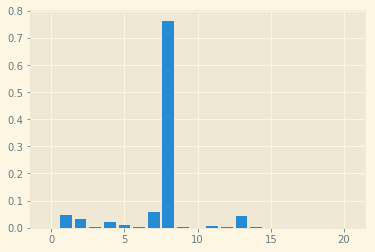

In [104]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = clf3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<a id = "8020"> <h2> Pipeline 3 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [107]:
df_pipeline3 = pd.read_csv("pipeline_3.csv")

<b> show all columns in dataset

In [108]:
list(df_pipeline3.columns)

['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

<a id = "800300"> <h2> 3.0 Basic Model Decision Tree Classifier </h2> </a>

In [109]:
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [110]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [111]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [112]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8613138686131386


In [113]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3131
           1       0.55      0.52      0.53       568

    accuracy                           0.86      3699
   macro avg       0.73      0.72      0.73      3699
weighted avg       0.86      0.86      0.86      3699



In [114]:
print(metrics.confusion_matrix(y_test, y_pred))

[[2893  238]
 [ 275  293]]


<b> ROC Curve

In [264]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

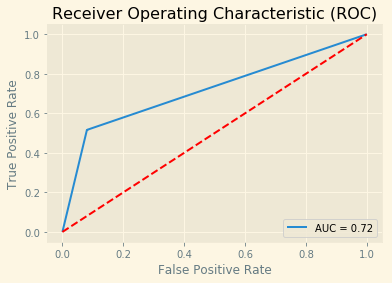

AUC score: 0.717791980243004


In [265]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "800310"> <h2> 3.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [115]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 23)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the <b> training </b> dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [116]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_res,y_train_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3131
           1       0.49      0.61      0.54       568

    accuracy                           0.84      3699
   macro avg       0.71      0.75      0.73      3699
weighted avg       0.86      0.84      0.85      3699



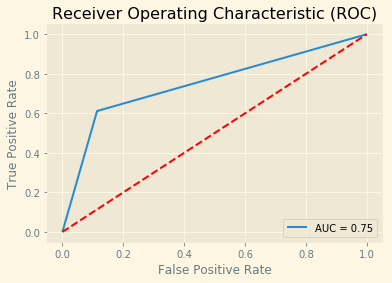

AUC score: 0.7488886127367849


In [117]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "800320"> <h2> 3.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [269]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (2680, 23)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


/opt/tljh/user/lib/python3.6/site-packages/imblearn/utils/deprecation.py:45: DeprecationWarning: 'random_state' is deprecated from 0.4 and will be removed in 0.6 for the estimator <class 'imblearn.under_sampling._prototype_selection._nearmiss.NearMiss'>.
  category=DeprecationWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 

The NearMiss Algorithm has undersampled the instances in the majority class and made it equal to minority class:
* Both classes (0 & 1) now have 1340 instances, the dataset is balanced.
* Class 0 decreased from 7291 instances to 1340 instances, a decrease of 5951 instances of class 0.

In [270]:
# train the model on train set 
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_miss, y_train_miss) 
y_pred = clf2.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.59      0.71      3131
           1       0.22      0.62      0.32       568

    accuracy                           0.59      3699
   macro avg       0.56      0.61      0.51      3699
weighted avg       0.79      0.59      0.65      3699



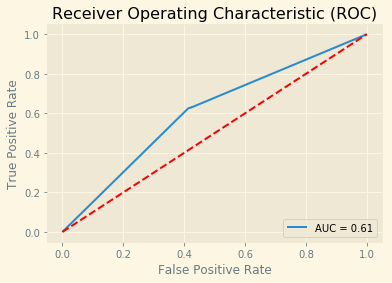

AUC score: 0.6052882690586188


In [271]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "800330"> <h2> 3.3 Cross Validation (Oversampling)  </h2> </a>

In [272]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
result = cross_val_score(clf, X_train_res, y_train_res, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.88622344 0.89581905 0.89986283 0.88683128 0.89643347 0.89643347
 0.89643347 0.89163237 0.87860082 0.89506173] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8923 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.59259
to:
0.89233
This is because we only use: 90.00% of our dataset to train the model!


In [273]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.88202286 0.89718995 0.90192501 0.88341202 0.89643927 0.89572405
 0.89575231 0.89235337 0.87791702 0.89574642] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8918 



<b> ROC Curve Cross validation on oversampled dataset

In [274]:
def roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=DecisionTreeClassifier(), user_defined_splits=10):
    # define two lists to write to for the true positive rate and the auc scores
    cv = StratifiedKFold(n_splits=user_defined_splits)
    tprs = []
    aucs = []
    
    # plot the line through the middle
    # Return evenly spaced numbers over a specified interval.
    mean_fpr = np.linspace(0, 1, 100)

    # set the figure and ax objects with the figure size
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # for loop to iterate over multiple folds
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    # print out the mean AUC score
    print('Mean AUC score', mean_auc)

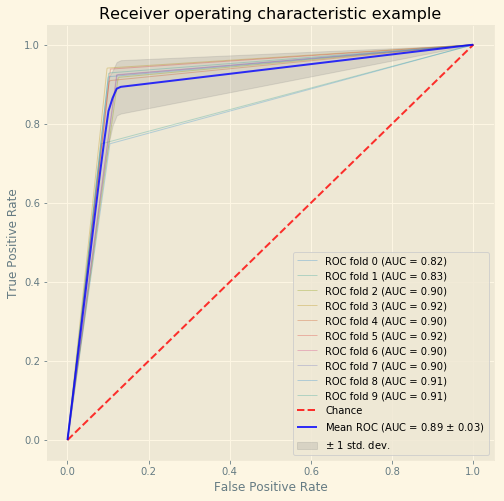

Mean AUC score 0.8916241740250358


In [275]:
# apply the function to plot the ROC curve with the average AUC score
roc_curve_kfold_cross_validation(X=X_train_res, y=y_train_res, classifier=DecisionTreeClassifier(), user_defined_splits=10)

<a id = "800340"> <h2> 3.4 Cross Validation (Undersampling)  </h2> </a>

In [276]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
result = cross_val_score(clf2, X_train_miss, y_train_miss, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.60820896 0.68283582 0.58955224 0.69402985 0.66791045 0.63432836
 0.61567164 0.62686567 0.63432836 0.67164179] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.6425 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.59259
to:
0.64254
This is because we only use: 90.00% of our dataset to train the model!


In [277]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf2, X_train_miss, y_train_miss, cv=kfold, scoring='f1_weighted')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.61880787 0.68289336 0.58679775 0.68640998 0.64933187 0.66770236
 0.60060725 0.63008698 0.63383949 0.6662709 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.6423 



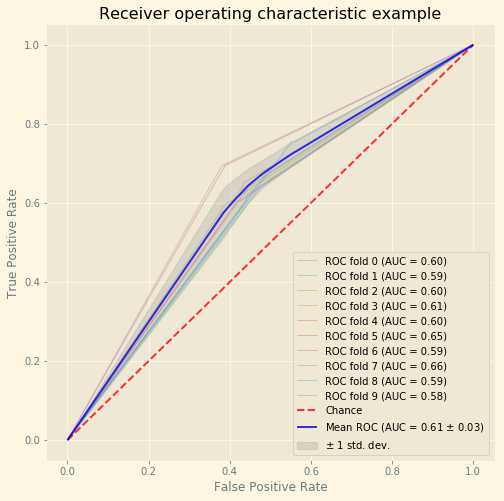

Mean AUC score 0.6068401500502716


In [278]:
# apply the function to plot the ROC curve with the average AUC score
roc_curve_kfold_cross_validation(X=X_train_miss, y=y_train_miss, classifier=DecisionTreeClassifier(), user_defined_splits=10)

<a id = "800350"> <h2> 3.5 Model Tuning (Hyperparameters) </h2> </a>
___


<b> Define Grid

In [279]:
criterion= ['gini', 'entropy'] 
splitter= ['best', 'random'] 
max_depth= [3,5,10] 
param_grid = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

<b> Hyper-parameter tweaking on oversampled training set

In [280]:
# set the start time
start = time.time()

# define the model
clf = DecisionTreeClassifier()

# Create a grid search object
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_criterion = grid.best_estimator_.get_params()['criterion']
optimal_splitter = grid.best_estimator_.get_params()['splitter']
optimal_max_depth = grid.best_estimator_.get_params()['max_depth']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.870183 using {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
--- Execution time: ---
--- 270.060ms. --- 
--- 0.27005982398986816 seconds ---
--- 0.0045009970664978026 minutes ---


<b> Applying the optimal hyper-parameters on oversampled training set

In [281]:
# apply the optimal hyper-parameters to the Logistic Regression Model
clf3 = DecisionTreeClassifier(criterion=optimal_criterion, splitter=optimal_splitter, max_depth=optimal_max_depth)

# fit/train the model with oversampled training set
clf3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=clf3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      3131
           1       0.46      0.72      0.56       568

    accuracy                           0.83      3699
   macro avg       0.70      0.78      0.73      3699
weighted avg       0.87      0.83      0.84      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [282]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.8852616  0.8834343  0.88329327 0.88341641 0.87368247 0.87009626
 0.8779053  0.881358   0.86956789 0.87959173] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8788 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.93652051 0.95153974 0.94419309 0.93530621 0.93765446 0.944349
 0.94659904 0.94356826 0.94359011 0.94093313] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9424 



<b> Cross validation on X and Y

In [283]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(clf3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(clf3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.892 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.888 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8731


<a id = "81000"> <h2> Results </h2> </a>
___

<b> Left align all markdown tables

In [85]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Pipeline 1 Results </b>
_Note:_ tool used for Excel table to markdown conversion, namely: https://tableconvert.com/

| **Model**                           | **weighted avg F1-score** | **AUC score** |
|-----------------------------------|:-------------------------:|:-------------:|
| Basic Model                         | 0\.86                     | 0\.7222     |
| Oversampled Model \(SMOTE\)         | 0\.86                     | 0\.7186     |
| Undersampled Model \(Nearmiss\)     | 0\.39                     | 0\.4827     |
| Cross validation Oversampled Model  | 0\.87                     | 0\.8717     |
| Cross validation Undersampled Model | 0\.69                     | 0\.6416     |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.8678                    | 0\.9351       |

\* _Average AUC score using 10 fold Kfold cross validation_

<b> Take-away: </b> 

### Pipeline 2 Results </b>

| **Model**                           | **weighted avg F1-score** | **AUC score** |
|-----------------------------------|:-------------------------:|:-------------:|
| Basic Model                         | 0\.86                     | 0\.7369     |
| Oversampled Model \(SMOTE\)         | 0\.86                     | 0\.7339     |
| Undersampled Model \(Nearmiss\)     | 0\.63                     | 0\.6171     |
| Cross validation Oversampled Model  | 0\.89                     | 0\.8931     |
| Cross validation Undersampled Model | 0\.70                     | 0\.6734     |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.8922                    | 0\.9436       |

\* _Average AUC score using 10 fold Kfold cross validation_

<b> Take-away: </b> 

### Pipeline 3 Results </b>

| **Model**                           | **weighted avg F1-score** | **AUC score** |
|-----------------------------------|:-------------------------:|:-------------:|
| Basic Model                         | 0\.86                     | 0\.7237     |
| Oversampled Model \(SMOTE\)         | 0\.86                     | 0\.7281     |
| Undersampled Model \(Nearmiss\)     | 0\.65                     | 0\.6112     |
| Cross validation Oversampled Model  | 0\.89                     | 0\.8903     |
| Cross validation Undersampled Model | 0\.65                     | 0\.6021     |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.8738                    | 0\.9415       |

\* _Average AUC score using 10 fold Kfold cross validation_

<b> Take-away: </b> 

<b> Conclusion: </b> 
